In [1]:
from nntool.api import NNGraph
from nntool.api.types import ConstantInputNode
from nntool.api.utils import model_settings, quantization_options

In [26]:
G = NNGraph.load_graph("shufflenet_relu.onnx")
G.adjust_order()
G.fusions("scaled_match_group")
# G.fake_quantize(
#     graph_options=quantization_options(scheme="FLOAT", float_type="bfloat16")
# )
G.fake_quantize(
    graph_options={"use_ne16": True, "hwc": True},
    node_options={G[3].name: quantization_options(use_ne16_im2col=True)})

In [27]:
G.draw(filepath="draw")

/snap/core20/current/lib/x86_64-linux-gnu/libstdc++.so.6: version `GLIBCXX_3.4.29' not found (required by /lib/x86_64-linux-gnu/libproxy.so.1)
Failed to load module: /home/francesco/snap/code/common/.cache/gio-modules/libgiolibproxy.so


In [37]:

for node in G.nodes():
    if len(node.name) > 20 and not isinstance(node, ConstantInputNode):
        node.at_options.node_cname = f"S{node.step_idx}_{node.name[-20:]}"
res = G.execute_on_target(
    directory="test_run",
    settings=model_settings(
        l1_size=128000,
        l2_size=500000,
        graph_warm_construct=2,
        graph_const_exec_from_flash=True,
        # graph_disable_const_l2_promotion=True,
        tensor_directory="weights",
        graph_l1_promotion=2
    ),
    dont_run=True,
    print_output=True,
    at_loglevel=2
)

Script started, output log file is '/tmp/tmp3n5_pn7h/log.txt'.
-- [Custom BSP] Custom BSP unused.
-- [Python] Interpreter found here /home/francesco/libraries/anaconda3/envs/ml_train/bin/python3.9
-- [Kconfig] KCONFIG_CONFIG environnement variable has not been exported.
-- [Kconfig] Using default value sdk: "sdk.config" and app: "sdk.config".
-- [AutoTiler] Tiler library is overriden with one at /home/francesco/works/release/AutotilerV2/install/lib/libtile.a
-- [NNTOOL] Using nntool in /home/francesco/works/release/gitlab_sdk/tools/nntool/scripts/nntool
-- [SFU] Using SFU in /home/francesco/works/release/gitlab_sdk/install/workstation/bin/SFU
-- [DT] Formating configuration file
-- [DT] Selected options : gap9_v2_wlcsp;gap9mod_v1_0_b;gap9evk_v1_3
-- [DT] Compiling gap9_v2_wlcsp.dts
-- [DT] Compiling gap9mod_v1_0_b.dts
-- [DT] Compiling gap9evk_v1_3.dts
-- [DT] Dumping C header file
-- [Board] GAP Family : 9
-- [Board] GAP Version : 2
-- [AutoTiler] Using SQ8 kernels
-- [AutoTiler] Usin

No content found in the memory for this area L3


[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

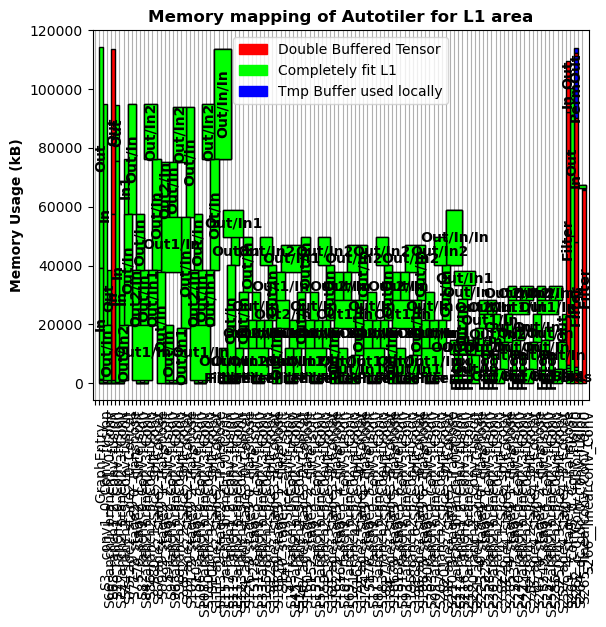

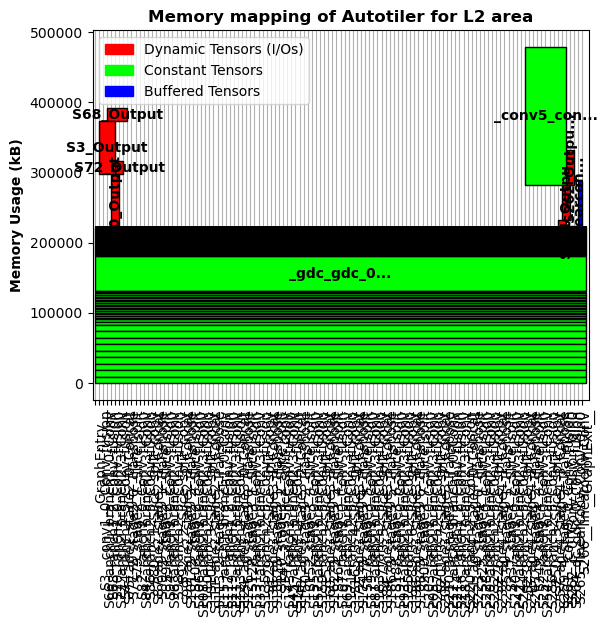

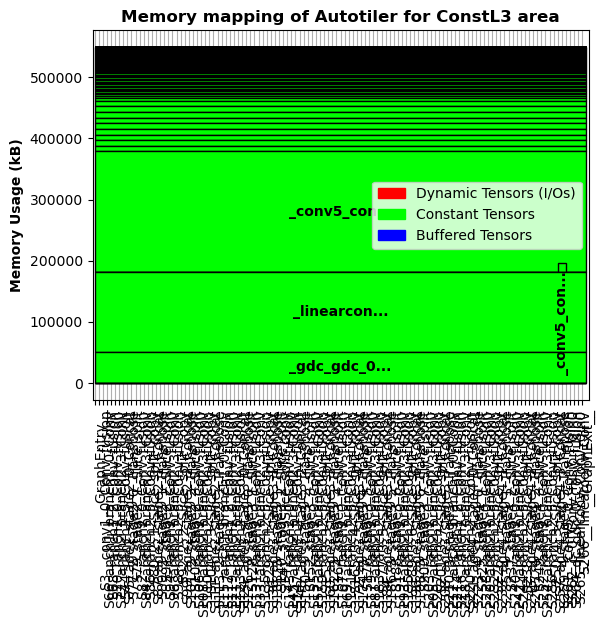

In [38]:
res.plot_memory_boxes()